In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_frame = pd.read_excel("Cleaning_stage_one_completed.xlsx")
data_frame.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
data_frame

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing
0,NaN,ALFA-ROMEO,155,1993.0,2.0,Automatic,Petrol,1500.0,2025-01-29,Nittambuwa,Available,Available,Available,Available,USED,No Leasing
1,10000000.0,AUDI,A1,2016.0,148000.0,Automatic,Petrol,990.0,2025-02-05,Gampaha,Available,Available,Available,Available,USED,No Leasing
2,9700000.0,AUDI,A1,2017.0,70000.0,Automatic,Petrol,1000.0,2025-01-14,Colombo,Available,Available,Available,Available,USED,No Leasing
3,9850000.0,AUDI,A1,2018.0,60000.0,Automatic,Petrol,1000.0,2025-01-23,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing
4,10700000.0,AUDI,A1,2017.0,80000.0,Automatic,Petrol,1000.0,2024-12-21,Negombo,Available,Available,Available,Available,USED,No Leasing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,2750000.0,ZOTYE,Z100,2018.0,48200.0,Manual,Petrol,1000.0,2024-12-16,Dambulla,Available,Available,Available,Available,USED,No Leasing
10547,2900000.0,ZOTYE,Z100,2019.0,68000.0,Manual,Petrol,998.0,2024-12-12,Nittambuwa,Available,Available,Available,Available,USED,No Leasing
10548,2750000.0,ZOTYE,Z100,2017.0,35640.0,Manual,Petrol,1000.0,2024-12-04,Anuradapura,Available,Available,Available,Available,USED,No Leasing
10549,875000.0,ZOTYE,ZOTYE,2017.0,106000.0,Manual,Petrol,1300.0,2025-01-13,Gampaha,Available,Available,Not_Available,Available,USED,No Leasing


In [5]:
editing_data_frame = data_frame

In [6]:
editing_data_frame.Model.isna().sum()

0

In [7]:
# Fill YOM Null values with Mean YOM according to Model and Make

In [8]:
model_make_grp = editing_data_frame.groupby(["Make","Model"])["YOM"].agg("mean").round(0)
model_make_grp.loc[("AUDI", "A1")]

2017.0

In [9]:
for (make, model), mean_yom in model_make_grp.items():
    editing_data_frame.loc[
        (
        (editing_data_frame["Make"] == make) & 
        (editing_data_frame["Model"] == model) & 
        (editing_data_frame["YOM"].isna() | (editing_data_frame["YOM"] > 2025))
        ),
        "YOM"
    ] = mean_yom

In [10]:
#editing_data_frame.drop([2628,10478,10479],inplace=True)

In [11]:
editing_data_frame.loc[editing_data_frame.YOM.isna()]

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing
2628,1975000.0,MORRIS,MINI MOKE,NaN,142000.0,Manual,Petrol,1000.0,2025-01-21,Piliyandala,Available,Available,Available,Available,USED,No Leasing
10478,NaN,TRIUMPH,HERALD,NaN,NaN,Manual,Petrol,1000.0,2025-01-18,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing
10479,NaN,TRIUMPH,HERALD,NaN,NaN,Manual,Petrol,1000.0,2025-01-18,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing


In [12]:
editing_data_frame.YOM.describe()

count    10548.000000
mean      2006.613481
std          9.990947
min       1952.000000
25%       2001.000000
50%       2009.000000
75%       2015.000000
max       2024.000000
Name: YOM, dtype: float64

In [14]:
# Replace Millage NaN data points and outliers

In [15]:
editing_data_frame["Mileage (km)"].describe()

count    9.923000e+03
mean     3.838467e+05
std      1.381244e+07
min      0.000000e+00
25%      8.000000e+04
50%      1.210000e+05
75%      1.645000e+05
max      1.111111e+09
Name: Mileage (km), dtype: float64

In [16]:
group_by_year = editing_data_frame.groupby("YOM")["Mileage (km)"].agg('mean').round()
group_by_year

YOM
1952.0         NaN
1956.0      1234.0
1958.0       123.0
1959.0     81916.0
1960.0    154095.0
            ...   
2020.0     63471.0
2021.0    227450.0
2022.0     83698.0
2023.0     35601.0
2024.0    137439.0
Name: Mileage (km), Length: 65, dtype: float64

In [17]:
for YOM,mean_millage in group_by_year.items():
    print(YOM,mean_millage)
    editing_data_frame.loc[
        (editing_data_frame["YOM"] == YOM)&
        (editing_data_frame["Mileage (km)"].isna()),
        "Mileage (km)"
    ] = mean_millage

1952.0 nan
1956.0 1234.0
1958.0 123.0
1959.0 81916.0
1960.0 154095.0
1961.0 77758.0
1962.0 0.0
1965.0 42556.0
1967.0 77828.0
1968.0 0.0
1969.0 13854505.0
1970.0 127342.0
1972.0 41193.0
1973.0 nan
1974.0 42000.0
1975.0 180000.0
1976.0 114641.0
1977.0 105878.0
1978.0 1472791.0
1979.0 108482.0
1980.0 415171.0
1981.0 549017.0
1982.0 84219.0
1983.0 366060.0
1984.0 391084.0
1985.0 1454555.0
1986.0 166400.0
1987.0 10489238.0
1988.0 279196.0
1989.0 213844.0
1990.0 190915.0
1991.0 174217.0
1992.0 242395.0
1993.0 217893.0
1994.0 155748.0
1995.0 1503150.0
1996.0 227150.0
1997.0 212445.0
1998.0 183689.0
1999.0 167978.0
2000.0 189597.0
2001.0 192634.0
2002.0 179932.0
2003.0 181254.0
2004.0 158631.0
2005.0 173107.0
2006.0 179665.0
2007.0 162232.0
2008.0 153183.0
2009.0 135118.0
2010.0 131686.0
2011.0 165542.0
2012.0 134664.0
2013.0 133123.0
2014.0 143443.0
2015.0 122254.0
2016.0 1490736.0
2017.0 117860.0
2018.0 74984.0
2019.0 53615.0
2020.0 63471.0
2021.0 227450.0
2022.0 83698.0
2023.0 35601.0
2024.

In [18]:
editing_data_frame["Mileage (km)"].isna().sum()

4

In [19]:
editing_data_frame.loc[editing_data_frame["Mileage (km)"].isna()]

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing
460,NaN,FORD,CORTINA,1973.0,NaN,Manual,Petrol,1300.0,2025-01-23,Kurunegala,Available,Not_Available,Not_Available,Not_Available,USED,No Leasing
2029,NaN,MG,MAGNETTE,1952.0,NaN,Manual,Petrol,1500.0,2025-02-05,Bandaragama,Available,Available,Available,Available,USED,No Leasing
10478,NaN,TRIUMPH,HERALD,NaN,NaN,Manual,Petrol,1000.0,2025-01-18,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing
10479,NaN,TRIUMPH,HERALD,NaN,NaN,Manual,Petrol,1000.0,2025-01-18,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing


In [20]:
editing_data_frame.loc[editing_data_frame["YOM"]==1961]

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing
88,3800000.0,AUSTIN,MORRIS MINI COOPER,1961.0,89000.0,Manual,Petrol,1275.0,2025-01-31,Kandy,Available,Not_Available,Not_Available,Not_Available,USED,No Leasing
2292,1875000.0,MINI,COOPER,1961.0,77758.0,Manual,Petrol,1300.0,2025-01-10,Gampaha,Available,Not_Available,Not_Available,Not_Available,USED,No Leasing
2299,1875000.0,MINI,COOPER,1961.0,100000.0,Manual,Petrol,1300.0,2024-12-24,Gampaha,Available,Not_Available,Not_Available,Not_Available,USED,No Leasing
2307,NaN,MINI,MINI,1961.0,44275.0,Manual,Petrol,1275.0,2025-02-01,Homagama,Available,Not_Available,Not_Available,Not_Available,USED,No Leasing


In [21]:
# replace NaN with 0
editing_data_frame["Mileage (km)"].fillna(0,inplace=True)

/tmp/ipykernel_11842/720553531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  editing_data_frame["Mileage (km)"].fillna(0,inplace=True)


In [22]:
editing_data_frame["Mileage (km)"].describe()

count    1.055100e+04
mean     3.987548e+05
std      1.340317e+07
min      0.000000e+00
25%      8.300000e+04
50%      1.250000e+05
75%      1.700000e+05
max      1.111111e+09
Name: Mileage (km), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a75da02c860>,
 'caps': [<matplotlib.lines.Line2D at 0x7a75da02d7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a75da02e630>],
 'medians': [<matplotlib.lines.Line2D at 0x7a75da02c980>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a75da02fa10>],
 'means': []}

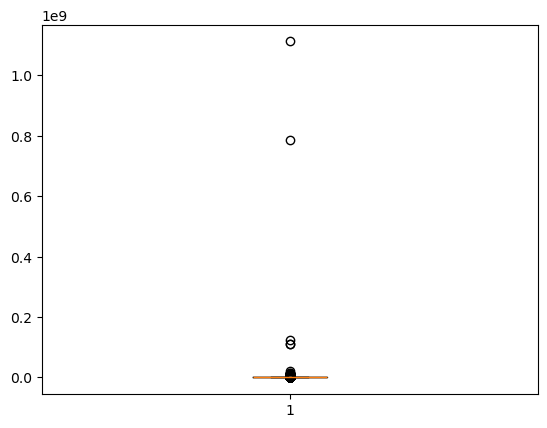

In [23]:
plt.boxplot(editing_data_frame["Mileage (km)"])

In [24]:
# Remove Millage Outliers using IQR method, Becasue This dataset has not any Brand new vehicles,therefor all the millage should be grater than 0

In [25]:
editing_data_frame.loc[editing_data_frame["Mileage (km)"]==0]

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing
175,2950000.0,BMW,E34,1990.0,0.0,Manual,Petrol,1796.0,2024-12-10,Gampaha,Available,Available,Available,Available,USED,No Leasing
330,800000.0,DAIHATSU,CHARADE G101S,1989.0,0.0,Manual,Diesel,1000.0,2025-01-29,Kandy,Available,Available,Not_Available,Available,USED,No Leasing
460,NaN,FORD,CORTINA,1973.0,0.0,Manual,Petrol,1300.0,2025-01-23,Kurunegala,Available,Not_Available,Not_Available,Not_Available,USED,No Leasing
540,3190000.0,HONDA,CITY,2000.0,0.0,Automatic,Petrol,1500.0,2025-02-01,Kaduwela,Available,Available,Available,Available,USED,No Leasing
1503,3950000.0,JEEP,AMERICAN WILLYS,1962.0,0.0,Manual,Diesel,2800.0,2025-01-23,Jaffna,Not_Available,Available,Not_Available,Not_Available,USED,No Leasing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,NaN,TOYOTA,VITZ,2011.0,0.0,Automatic,Petrol,1000.0,2024-12-24,Kiribathgoda,Available,Available,Available,Available,USED,No Leasing
10478,NaN,TRIUMPH,HERALD,NaN,0.0,Manual,Petrol,1000.0,2025-01-18,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing
10479,NaN,TRIUMPH,HERALD,NaN,0.0,Manual,Petrol,1000.0,2025-01-18,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing
10503,1650000.0,VOLVO,850,1995.0,0.0,Automatic,Petrol,2000.0,2025-02-05,Gampaha,Available,Available,Available,Available,NEW,No Leasing


In [26]:
editing_data_frame["Mileage (km)"] = editing_data_frame["Mileage (km)"].astype("int")

In [27]:
editing_data_frame["Mileage (km)"].describe()

count    1.055100e+04
mean     3.987548e+05
std      1.340317e+07
min      0.000000e+00
25%      8.300000e+04
50%      1.250000e+05
75%      1.700000e+05
max      1.111111e+09
Name: Mileage (km), dtype: float64

In [28]:
# Millag has lots of error points and it has more varience. There for i will get a new column called Average Millage . i have get a average millage per year is 10000KM
# (Accoding to the details on internet.)


#Private cars: 8,000 to 12,000 km (5,000 to 7,500 miles) per year
#Taxis (Ride-sharing, three-wheelers, etc.): 20,000+ km (12,500+ miles) per year
#Commercial vehicles (vans, trucks, etc.): 30,000+ km (18,500+ miles) per year


In [29]:
editing_data_frame["Average_millage"] = editing_data_frame["YOM"].apply(lambda YOM:(2025-YOM)*11000)
editing_data_frame

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
0,NaN,ALFA-ROMEO,155,1993.0,2,Automatic,Petrol,1500.0,2025-01-29,Nittambuwa,Available,Available,Available,Available,USED,No Leasing,352000.0
1,10000000.0,AUDI,A1,2016.0,148000,Automatic,Petrol,990.0,2025-02-05,Gampaha,Available,Available,Available,Available,USED,No Leasing,99000.0
2,9700000.0,AUDI,A1,2017.0,70000,Automatic,Petrol,1000.0,2025-01-14,Colombo,Available,Available,Available,Available,USED,No Leasing,88000.0
3,9850000.0,AUDI,A1,2018.0,60000,Automatic,Petrol,1000.0,2025-01-23,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing,77000.0
4,10700000.0,AUDI,A1,2017.0,80000,Automatic,Petrol,1000.0,2024-12-21,Negombo,Available,Available,Available,Available,USED,No Leasing,88000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,2750000.0,ZOTYE,Z100,2018.0,48200,Manual,Petrol,1000.0,2024-12-16,Dambulla,Available,Available,Available,Available,USED,No Leasing,77000.0
10547,2900000.0,ZOTYE,Z100,2019.0,68000,Manual,Petrol,998.0,2024-12-12,Nittambuwa,Available,Available,Available,Available,USED,No Leasing,66000.0
10548,2750000.0,ZOTYE,Z100,2017.0,35640,Manual,Petrol,1000.0,2024-12-04,Anuradapura,Available,Available,Available,Available,USED,No Leasing,88000.0
10549,875000.0,ZOTYE,ZOTYE,2017.0,106000,Manual,Petrol,1300.0,2025-01-13,Gampaha,Available,Available,Not_Available,Available,USED,No Leasing,88000.0


In [30]:
# Engine Capacity

In [31]:
editing_data_frame.loc[editing_data_frame["Engine (cc)"].isna()]

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
67,NaN,AUDI,A8L,2013.0,120000,Automatic,Diesel,NaN,2025-01-03,Maharagama,Available,Available,Available,Available,USED,No Leasing,132000.0
168,NaN,BMW,740LE,2019.0,2000,Automatic,Petrol,NaN,2024-12-05,Galle,Available,Available,Available,Available,NEW,No Leasing,66000.0
185,33000000.0,BMW,I8,2016.0,36000,Automatic,Electric,NaN,2025-01-24,Malabe,Available,Available,Available,Available,USED,No Leasing,99000.0
201,NaN,CHERY,QQ,2011.0,165542,Manual,Petrol,NaN,2025-02-05,Nittambuwa,Available,Available,Available,Available,USED,Ongoing Lease,154000.0
209,NaN,CHERY,QQ,2006.0,179665,Manual,Petrol,NaN,2025-02-01,Kurunegala,Available,Available,Not_Available,Available,USED,No Leasing,209000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,NaN,TOYOTA,VITZ KSP90,2007.0,130000,Automatic,Petrol,NaN,2025-01-12,Kurunegala,Available,Available,Available,Available,USED,No Leasing,198000.0
10430,NaN,TOYOTA,YARIS,2008.0,1,Automatic,Petrol,NaN,2025-01-17,Mawanella,Available,Available,Available,Available,USED,No Leasing,187000.0
10453,NaN,TOYOTA,YARIS,2008.0,154,Manual,Petrol,NaN,2025-01-04,Colombo,Available,Not_Available,Not_Available,Available,USED,No Leasing,187000.0
10517,2200000.0,VOLVO,S940,1993.0,217893,Automatic,Diesel,NaN,2024-12-30,Kadawatha,Available,Available,Available,Available,USED,No Leasing,352000.0


In [32]:
editing_data_frame.loc[(editing_data_frame["Make"]=="TOYOTA") & (editing_data_frame["Model"]=="YARIS")].head()

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
10417,6450000.0,TOYOTA,YARIS,2007.0,160000,Automatic,Petrol,1300.0,2025-02-05,Balangoda,Available,Available,Available,Available,USED,No Leasing,198000.0
10418,NaN,TOYOTA,YARIS,2008.0,140000,Automatic,Petrol,1300.0,2025-02-05,Negombo,Available,Available,Available,Available,USED,No Leasing,187000.0
10419,6400000.0,TOYOTA,YARIS,2007.0,134000,Automatic,Petrol,1300.0,2025-02-05,Anuradapura,Available,Available,Available,Available,USED,No Leasing,198000.0
10420,6000000.0,TOYOTA,YARIS,2006.0,176888,Automatic,Petrol,1300.0,2025-02-04,Nittambuwa,Available,Available,Available,Available,USED,No Leasing,209000.0
10421,NaN,TOYOTA,YARIS,2006.0,153000,Automatic,Petrol,1300.0,2025-02-04,Colombo,Available,Available,Available,Available,USED,No Leasing,209000.0


In [33]:
# Fill Engine CC Null values with Average Engine Capacity Relevent to Make,Model 

In [34]:
model_make_group_eng = editing_data_frame.groupby(["Make","Model"])["Engine (cc)"].agg("mean")
model_make_group_eng

Make        Model          
ALFA-ROMEO  155                1500.000000
AUDI        A1                 1070.000000
            A1 RS              1000.000000
            A1 TFSI            1000.000000
            A3                 1341.666667
                                  ...     
VOLVO       VOLVO              1397.000000
WILLYS      AMERICAN WILLYS    2800.000000
            CJ7                2400.000000
ZOTYE       Z100               1011.307692
            ZOTYE              1600.000000
Name: Engine (cc), Length: 1882, dtype: float64

In [35]:
for details,MEAN_CC in model_make_group_eng.items():
    make = details[0]
    model = details[1]
    editing_data_frame.loc[
    ((editing_data_frame["Model"]==model) & (editing_data_frame["Make"]==make)) &
    (editing_data_frame["Engine (cc)"].isna()) | (editing_data_frame["Engine (cc)"]<=500),
    "Engine (cc)"]=MEAN_CC


In [36]:
editing_data_frame.loc[editing_data_frame["Engine (cc)"].isna()]

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
168,NaN,BMW,740LE,2019.0,2000,Automatic,Petrol,NaN,2024-12-05,Galle,Available,Available,Available,Available,NEW,No Leasing,66000.0
185,33000000.0,BMW,I8,2016.0,36000,Automatic,Electric,NaN,2025-01-24,Malabe,Available,Available,Available,Available,USED,No Leasing,99000.0
279,760000.0,CHEVROLET,U-AV,2007.0,162232,Manual,Petrol,NaN,2025-01-11,Ragama,Available,Available,Not_Available,Not_Available,USED,No Leasing,198000.0
636,13650000.0,HONDA,CIVIC EX PACK,2017.0,78000,Automatic,Petrol,NaN,2025-02-04,Matara,Available,Available,Available,Available,USED,No Leasing,88000.0
951,8100000.0,HONDA,FIT GP5 GOLD BATCH,2014.0,136000,Automatic,Petrol,NaN,2025-02-01,Anuradapura,Available,Available,Available,Available,USED,No Leasing,121000.0
1614,5600000.0,KIA,SOUL,2010.0,150000,Automatic,Petrol,NaN,2025-02-03,Kotte,Available,Available,Available,Available,USED,No Leasing,165000.0
1967,NaN,MERCEDES-BENZ,E300 BLUETECH,2013.0,78000,Automatic,Diesel,NaN,2024-12-16,Kuliyapitiya,Available,Available,Available,Available,USED,No Leasing,132000.0
1970,NaN,MERCEDES-BENZ,E300 NIGHT EDITION BLUETEC,2013.0,78000,Automatic,Diesel,NaN,2024-12-10,Kuliyapitiya,Available,Available,Available,Not_Available,USED,No Leasing,132000.0
2026,19700000.0,MG,4 ICON LONG RANGE,2024.0,500,Automatic,Electric,NaN,2025-01-18,Colombo,Available,Available,Available,Available,USED,No Leasing,11000.0
2047,5900000.0,MICRO,EMGRAND 7,2015.0,72000,Automatic,Petrol,NaN,2025-01-27,Beruwala,Available,Available,Available,Not_Available,USED,No Leasing,110000.0


In [37]:
editing_data_frame.isna().sum()

Price              2265
Make                  0
Model                 0
YOM                   3
Mileage (km)          0
Gear                  0
Fuel Type             0
Engine (cc)          44
Date                  0
Town                  0
AIR CONDITION         0
POWER STEERING        0
POWER MIRROR          0
POWER WINDOW          0
Condition             0
Leasing               0
Average_millage       3
dtype: int64

In [38]:
editing_data_frame['Engine (cc)'] = editing_data_frame['Engine (cc)'].replace([np.inf, -np.inf], np.nan)
editing_data_frame = editing_data_frame.dropna(subset=['Engine (cc)'])
editing_data_frame['Engine (cc)'].describe()

count    10471.000000
mean      1353.135132
std       1315.237179
min        573.000000
25%       1000.000000
50%       1300.000000
75%       1500.000000
max      56992.000000
Name: Engine (cc), dtype: float64

In [39]:
editing_data_frame.isna().sum()

Price              2243
Make                  0
Model                 0
YOM                   3
Mileage (km)          0
Gear                  0
Fuel Type             0
Engine (cc)           0
Date                  0
Town                  0
AIR CONDITION         0
POWER STEERING        0
POWER MIRROR          0
POWER WINDOW          0
Condition             0
Leasing               0
Average_millage       3
dtype: int64

In [40]:
editing_data_frame.drop_duplicates(inplace=True)

/tmp/ipykernel_11842/3841352116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data_frame.drop_duplicates(inplace=True)


In [41]:
editing_data_frame.Condition.value_counts()

Condition
USED    10269
NEW       108
Name: count, dtype: int64

In [42]:
editing_data_frame

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
0,NaN,ALFA-ROMEO,155,1993.0,2,Automatic,Petrol,1500.0,2025-01-29,Nittambuwa,Available,Available,Available,Available,USED,No Leasing,352000.0
1,10000000.0,AUDI,A1,2016.0,148000,Automatic,Petrol,990.0,2025-02-05,Gampaha,Available,Available,Available,Available,USED,No Leasing,99000.0
2,9700000.0,AUDI,A1,2017.0,70000,Automatic,Petrol,1000.0,2025-01-14,Colombo,Available,Available,Available,Available,USED,No Leasing,88000.0
3,9850000.0,AUDI,A1,2018.0,60000,Automatic,Petrol,1000.0,2025-01-23,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing,77000.0
4,10700000.0,AUDI,A1,2017.0,80000,Automatic,Petrol,1000.0,2024-12-21,Negombo,Available,Available,Available,Available,USED,No Leasing,88000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,2750000.0,ZOTYE,Z100,2018.0,48200,Manual,Petrol,1000.0,2024-12-16,Dambulla,Available,Available,Available,Available,USED,No Leasing,77000.0
10547,2900000.0,ZOTYE,Z100,2019.0,68000,Manual,Petrol,998.0,2024-12-12,Nittambuwa,Available,Available,Available,Available,USED,No Leasing,66000.0
10548,2750000.0,ZOTYE,Z100,2017.0,35640,Manual,Petrol,1000.0,2024-12-04,Anuradapura,Available,Available,Available,Available,USED,No Leasing,88000.0
10549,875000.0,ZOTYE,ZOTYE,2017.0,106000,Manual,Petrol,1300.0,2025-01-13,Gampaha,Available,Available,Not_Available,Available,USED,No Leasing,88000.0


In [43]:
# Price

In [44]:
editing_data_frame.Price.describe()

count    8.156000e+03
mean     5.383724e+06
std      5.793408e+06
min      2.650000e+05
25%      2.500000e+06
50%      4.000000e+06
75%      6.790000e+06
max      1.290000e+08
Name: Price, dtype: float64

In [45]:
grp_make_model_year = editing_data_frame.groupby(["Make","Model","YOM"])["Price"].agg("mean")
grp_make_model_year

Make        Model  YOM   
ALFA-ROMEO  155    1993.0           NaN
AUDI        A1     2016.0    10000000.0
                   2017.0    10187500.0
                   2018.0     5450000.0
            A1 RS  2016.0    10500000.0
                                ...    
ZOTYE       Z100   2019.0     2800000.0
                   2020.0     3059000.0
                   2021.0     3150000.0
            ZOTYE  1999.0     1550000.0
                   2017.0      875000.0
Name: Price, Length: 3831, dtype: float64

In [46]:
for details,Mean_price in grp_make_model_year.items():
    make = details[0]
    model = details[1]
    YOM = details[2]
    
    editing_data_frame.loc[
    ((editing_data_frame["Model"]==model) & (editing_data_frame["Make"]==make) & (editing_data_frame["YOM"]==YOM)) &
    (editing_data_frame["Price"].isna()),
    "Price"]=Mean_price
    

In [47]:
editing_data_frame.isna().sum()

Price              587
Make                 0
Model                0
YOM                  2
Mileage (km)         0
Gear                 0
Fuel Type            0
Engine (cc)          0
Date                 0
Town                 0
AIR CONDITION        0
POWER STEERING       0
POWER MIRROR         0
POWER WINDOW         0
Condition            0
Leasing              0
Average_millage      2
dtype: int64

In [48]:
editing_data_frame.loc[editing_data_frame["Price"].isna()]

,Price,Make,Model,YOM,Mileage (km),Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
0,NaN,ALFA-ROMEO,155,1993.0,2,Automatic,Petrol,1500.0,2025-01-29,Nittambuwa,Available,Available,Available,Available,USED,No Leasing,352000.0
9,NaN,AUDI,A1 TFSI,2017.0,51000,Automatic,Petrol,1000.0,2025-01-31,Colombo,Available,Available,Available,Available,USED,No Leasing,88000.0
12,NaN,AUDI,A3,2016.0,115000,Automatic,Petrol,1650.0,2025-01-17,Gampaha,Available,Available,Available,Available,USED,No Leasing,99000.0
15,NaN,AUDI,A3,2015.0,115000,Automatic,Petrol,1650.0,2025-01-20,Gampaha,Available,Available,Available,Available,USED,No Leasing,110000.0
16,NaN,AUDI,A3 R-S3 LINE,2018.0,98000,Automatic,Petrol,1400.0,2025-01-31,Kottawa,Available,Available,Available,Available,USED,No Leasing,77000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,NaN,VOLVO,240 GL,1995.0,99999,Manual,Diesel,2500.0,2025-01-13,Anuradapura,Available,Available,Not_Available,Available,USED,No Leasing,330000.0
10499,NaN,VOLVO,340 GL,1986.0,150000,Manual,Petrol,1397.0,2025-02-02,Kegalle,Available,Not_Available,Not_Available,Not_Available,USED,No Leasing,429000.0
10502,NaN,VOLVO,760,1987.0,10489238,Manual,Diesel,1970.0,2024-12-22,Kurunegala,Available,Available,Available,Available,USED,No Leasing,418000.0
10505,NaN,VOLVO,850,1997.0,450000,Automatic,Petrol,2000.0,2024-12-09,Kurunegala,Available,Available,Available,Available,USED,No Leasing,308000.0


In [49]:
editing_data_frame.dropna(inplace=True)

/tmp/ipykernel_11842/1668627342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data_frame.dropna(inplace=True)


In [50]:
editing_data_frame.drop("Mileage (km)",axis=1,inplace=True)

/tmp/ipykernel_11842/1793939817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data_frame.drop("Mileage (km)",axis=1,inplace=True)


In [51]:
editing_data_frame

,Price,Make,Model,YOM,Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
1,10000000.0,AUDI,A1,2016.0,Automatic,Petrol,990.0,2025-02-05,Gampaha,Available,Available,Available,Available,USED,No Leasing,99000.0
2,9700000.0,AUDI,A1,2017.0,Automatic,Petrol,1000.0,2025-01-14,Colombo,Available,Available,Available,Available,USED,No Leasing,88000.0
3,9850000.0,AUDI,A1,2018.0,Automatic,Petrol,1000.0,2025-01-23,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing,77000.0
4,10700000.0,AUDI,A1,2017.0,Automatic,Petrol,1000.0,2024-12-21,Negombo,Available,Available,Available,Available,USED,No Leasing,88000.0
5,9950000.0,AUDI,A1,2017.0,Automatic,Petrol,1000.0,2024-12-21,Colombo,Available,Available,Available,Available,USED,No Leasing,88000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,2750000.0,ZOTYE,Z100,2018.0,Manual,Petrol,1000.0,2024-12-16,Dambulla,Available,Available,Available,Available,USED,No Leasing,77000.0
10547,2900000.0,ZOTYE,Z100,2019.0,Manual,Petrol,998.0,2024-12-12,Nittambuwa,Available,Available,Available,Available,USED,No Leasing,66000.0
10548,2750000.0,ZOTYE,Z100,2017.0,Manual,Petrol,1000.0,2024-12-04,Anuradapura,Available,Available,Available,Available,USED,No Leasing,88000.0
10549,875000.0,ZOTYE,ZOTYE,2017.0,Manual,Petrol,1300.0,2025-01-13,Gampaha,Available,Available,Not_Available,Available,USED,No Leasing,88000.0


In [52]:
editing_data_frame.loc[editing_data_frame["Engine (cc)"]>10000]

,Price,Make,Model,YOM,Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
159,3.645000e+07,BMW,530E,2017.0,Automatic,Petrol,54496.0,2025-02-04,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing,88000.0
265,3.500000e+06,CHEVROLET,CRUZE,2002.0,Automatic,Petrol,13000.0,2025-01-27,Mirigama,Available,Available,Available,Available,USED,No Leasing,253000.0
488,2.950000e+06,FORD,LASER,2000.0,Manual,Petrol,15000.0,2025-01-26,Ratnapura,Available,Available,Available,Available,USED,No Leasing,275000.0
609,1.050000e+06,HONDA,CIVIC EK3,1998.0,Automatic,Petrol,15000.0,2025-01-02,Polgahawela,Available,Available,Available,Available,USED,Ongoing Lease,297000.0
988,8.475000e+06,HONDA,FIT GP5 S GRADE,2013.0,Automatic,Hybrid,15000.0,2025-02-01,Balangoda,Available,Available,Available,Available,USED,No Leasing,132000.0
1101,1.050000e+07,HONDA,GRACE EX,2016.0,Automatic,Hybrid,15000.0,2025-02-03,Matara,Available,Available,Available,Available,USED,No Leasing,99000.0
1176,7.400000e+06,HONDA,INSIGHT,2011.0,Automatic,Petrol,13000.0,2025-01-25,Kegalle,Available,Available,Available,Available,USED,No Leasing,154000.0
1188,6.950000e+06,HONDA,INSIGHT,2009.0,Automatic,Hybrid,13000.0,2024-12-04,Colombo,Available,Available,Available,Available,USED,No Leasing,176000.0
1321,2.200000e+06,HYUNDAI,ACCENT,2002.0,Manual,Petrol,15000.0,2024-12-16,Rajagiriya,Available,Available,Available,Available,USED,No Leasing,253000.0
1632,8.875000e+06,MAZDA,2 SKYACTIVE,2016.0,Automatic,Petrol,15000.0,2024-12-20,Kottawa,Available,Available,Available,Available,USED,No Leasing,99000.0


In [53]:
editing_data_frame["Engine (cc)"] = editing_data_frame["Engine (cc)"].astype("int")

/tmp/ipykernel_11842/649240539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data_frame["Engine (cc)"] = editing_data_frame["Engine (cc)"].astype("int")


In [54]:
grp_make_model_cc_mode = editing_data_frame.groupby(["Make", "Model"])["Engine (cc)"].apply(lambda x: x.mode().iloc[0])
grp_make_model_cc_mode

Make    Model          
AUDI    A1                 1000
        A1 RS              1000
        A3                 1000
        A3 S LINE          1000
        A3 S-LINE           999
                           ... 
VOLVO   VOLVO              1397
WILLYS  AMERICAN WILLYS    2800
        CJ7                2400
ZOTYE   Z100               1000
        ZOTYE              1300
Name: Engine (cc), Length: 1575, dtype: int64

In [55]:
for details,mode_cc in grp_make_model_cc_mode.items():
    make = details[0]
    model = details[1]
    
    editing_data_frame.loc[
    ((editing_data_frame["Model"]==model) & (editing_data_frame["Make"]==make)) &
    (editing_data_frame["Engine (cc)"]>10000),
    "Engine (cc)"]=mode_cc

In [56]:
editing_data_frame["Engine (cc)"].describe()

count     9789.000000
mean      1280.367453
std        619.935122
min        573.000000
25%       1000.000000
50%       1300.000000
75%       1500.000000
max      22000.000000
Name: Engine (cc), dtype: float64

In [57]:
editing_data_frame.dtypes

Price                     float64
Make                       object
Model                      object
YOM                       float64
Gear                       object
Fuel Type                  object
Engine (cc)                 int64
Date               datetime64[ns]
Town                       object
AIR CONDITION              object
POWER STEERING             object
POWER MIRROR               object
POWER WINDOW               object
Condition                  object
Leasing                    object
Average_millage           float64
dtype: object

In [58]:
editing_data_frame.loc[editing_data_frame["Engine (cc)"] >= 10000, "Engine (cc)"] /= 10

/tmp/ipykernel_11842/1016889262.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1500.  1300.  2200.  1000.  1300.8 1000.  1000.  1000.  1000.  1500.
 1000.  1500.  1000.  1000.  1000.  1000. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  editing_data_frame.loc[editing_data_frame["Engine (cc)"] >= 10000, "Engine (cc)"] /= 10


In [59]:
editing_data_frame["Engine (cc)"].describe()

count    9789.000000
mean     1262.622311
std       420.561083
min       573.000000
25%      1000.000000
50%      1300.000000
75%      1500.000000
max      8000.000000
Name: Engine (cc), dtype: float64

In [60]:
editing_data_frame["Engine (cc)"] = editing_data_frame["Engine (cc)"].apply(lambda x:x/10 if x>=8000 else x)

/tmp/ipykernel_11842/3038774334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data_frame["Engine (cc)"] = editing_data_frame["Engine (cc)"].apply(lambda x:x/10 if x>=8000 else x)


In [61]:
editing_data_frame.loc[editing_data_frame["Engine (cc)"]>=3500]

,Price,Make,Model,YOM,Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
191,35000000.0,BMW,M5 4400,2012.0,Automatic,Petrol,4400.0,2025-01-17,Colombo,Available,Available,Available,Available,USED,No Leasing,143000.0
1986,8450000.0,MERCEDES-BENZ,S350 W220,2004.0,Automatic,Petrol,3750.0,2025-01-21,Kotte,Available,Available,Available,Available,USED,No Leasing,231000.0
1987,55000000.0,MERCEDES-BENZ,S400 LONG WHEEL BASE,2015.0,Automatic,Petrol,3500.0,2025-02-05,Colombo,Available,Available,Available,Available,USED,No Leasing,110000.0
8894,14500000.0,TOYOTA,CROWN,2008.0,Automatic,Petrol,3500.0,2025-01-31,Ja-Ela,Available,Available,Available,Available,USED,No Leasing,187000.0
9067,26500000.0,TOYOTA,LEXUS 600HL,2007.0,Automatic,Hybrid,4800.0,2025-01-18,Kandy,Available,Available,Available,Available,USED,No Leasing,198000.0


In [62]:
editing_data_frame["Engine (cc)"].describe()

count    9789.000000
mean     1260.415752
std       403.757014
min       573.000000
25%      1000.000000
50%      1300.000000
75%      1500.000000
max      4800.000000
Name: Engine (cc), dtype: float64

In [63]:
editing_data_frame

,Price,Make,Model,YOM,Gear,Fuel Type,Engine (cc),Date,Town,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Condition,Leasing,Average_millage
1,10000000.0,AUDI,A1,2016.0,Automatic,Petrol,990.0,2025-02-05,Gampaha,Available,Available,Available,Available,USED,No Leasing,99000.0
2,9700000.0,AUDI,A1,2017.0,Automatic,Petrol,1000.0,2025-01-14,Colombo,Available,Available,Available,Available,USED,No Leasing,88000.0
3,9850000.0,AUDI,A1,2018.0,Automatic,Petrol,1000.0,2025-01-23,Dehiwala-Mount-Lavinia,Available,Available,Available,Available,USED,No Leasing,77000.0
4,10700000.0,AUDI,A1,2017.0,Automatic,Petrol,1000.0,2024-12-21,Negombo,Available,Available,Available,Available,USED,No Leasing,88000.0
5,9950000.0,AUDI,A1,2017.0,Automatic,Petrol,1000.0,2024-12-21,Colombo,Available,Available,Available,Available,USED,No Leasing,88000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,2750000.0,ZOTYE,Z100,2018.0,Manual,Petrol,1000.0,2024-12-16,Dambulla,Available,Available,Available,Available,USED,No Leasing,77000.0
10547,2900000.0,ZOTYE,Z100,2019.0,Manual,Petrol,998.0,2024-12-12,Nittambuwa,Available,Available,Available,Available,USED,No Leasing,66000.0
10548,2750000.0,ZOTYE,Z100,2017.0,Manual,Petrol,1000.0,2024-12-04,Anuradapura,Available,Available,Available,Available,USED,No Leasing,88000.0
10549,875000.0,ZOTYE,ZOTYE,2017.0,Manual,Petrol,1300.0,2025-01-13,Gampaha,Available,Available,Not_Available,Available,USED,No Leasing,88000.0


In [64]:
editing_data_frame["YOM"] = editing_data_frame["YOM"].astype("int")
editing_data_frame.dtypes


/tmp/ipykernel_11842/2318546794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data_frame["YOM"] = editing_data_frame["YOM"].astype("int")


Price                     float64
Make                       object
Model                      object
YOM                         int64
Gear                       object
Fuel Type                  object
Engine (cc)               float64
Date               datetime64[ns]
Town                       object
AIR CONDITION              object
POWER STEERING             object
POWER MIRROR               object
POWER WINDOW               object
Condition                  object
Leasing                    object
Average_millage           float64
dtype: object

In [65]:
# change column order
col_order = ["Make","Model","YOM","Engine (cc)","Gear","Fuel Type","Average_millage","Town","Date","Leasing","Condition","AIR CONDITION","POWER STEERING","POWER MIRROR","POWER WINDOW","Price"]

In [66]:
final_df = editing_data_frame[col_order]

In [67]:
final_df

,Make,Model,YOM,Engine (cc),Gear,Fuel Type,Average_millage,Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
1,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,2025-02-05,No Leasing,USED,Available,Available,Available,Available,10000000.0
2,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2025-01-14,No Leasing,USED,Available,Available,Available,Available,9700000.0
3,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,2025-01-23,No Leasing,USED,Available,Available,Available,Available,9850000.0
4,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,10700000.0
5,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,9950000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,ZOTYE,Z100,2018,1000.0,Manual,Petrol,77000.0,Dambulla,2024-12-16,No Leasing,USED,Available,Available,Available,Available,2750000.0
10547,ZOTYE,Z100,2019,998.0,Manual,Petrol,66000.0,Nittambuwa,2024-12-12,No Leasing,USED,Available,Available,Available,Available,2900000.0
10548,ZOTYE,Z100,2017,1000.0,Manual,Petrol,88000.0,Anuradapura,2024-12-04,No Leasing,USED,Available,Available,Available,Available,2750000.0
10549,ZOTYE,ZOTYE,2017,1300.0,Manual,Petrol,88000.0,Gampaha,2025-01-13,No Leasing,USED,Available,Available,Not_Available,Available,875000.0


In [68]:
final_df.rename(columns={'Make':'Brand',"Average_millage":"Millage(KM)"},inplace=True)

In [69]:
final_df.isna().sum()

Brand             0
Model             0
YOM               0
Engine (cc)       0
Gear              0
Fuel Type         0
Millage(KM)       0
Town              0
Date              0
Leasing           0
Condition         0
AIR CONDITION     0
POWER STEERING    0
POWER MIRROR      0
POWER WINDOW      0
Price             0
dtype: int64

In [155]:
final_df.to_csv("vehicle_price_dataset.csv")

In [157]:
final_df

,Brand,Model,YOM,Engine (cc),Gear,Fuel Type,Millage(KM),Town,Date,Leasing,Condition,AIR CONDITION,POWER STEERING,POWER MIRROR,POWER WINDOW,Price
1,AUDI,A1,2016,990.0,Automatic,Petrol,99000.0,Gampaha,2025-02-05,No Leasing,USED,Available,Available,Available,Available,10000000.0
2,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2025-01-14,No Leasing,USED,Available,Available,Available,Available,9700000.0
3,AUDI,A1,2018,1000.0,Automatic,Petrol,77000.0,Dehiwala-Mount-Lavinia,2025-01-23,No Leasing,USED,Available,Available,Available,Available,9850000.0
4,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Negombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,10700000.0
5,AUDI,A1,2017,1000.0,Automatic,Petrol,88000.0,Colombo,2024-12-21,No Leasing,USED,Available,Available,Available,Available,9950000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10546,ZOTYE,Z100,2018,1000.0,Manual,Petrol,77000.0,Dambulla,2024-12-16,No Leasing,USED,Available,Available,Available,Available,2750000.0
10547,ZOTYE,Z100,2019,998.0,Manual,Petrol,66000.0,Nittambuwa,2024-12-12,No Leasing,USED,Available,Available,Available,Available,2900000.0
10548,ZOTYE,Z100,2017,1000.0,Manual,Petrol,88000.0,Anuradapura,2024-12-04,No Leasing,USED,Available,Available,Available,Available,2750000.0
10549,ZOTYE,ZOTYE,2017,1300.0,Manual,Petrol,88000.0,Gampaha,2025-01-13,No Leasing,USED,Available,Available,Not_Available,Available,875000.0
